Hi

In [1]:
import ionerdss as ion
import os
import subprocess
from IPython.display import display, Image

In [2]:
pdb_id = '8y7s'
save_folder = '~/Documents/8y7s_dir'

pdb_model = ion.PDBModel(pdb_id=pdb_id, save_dir=save_folder)

# set standard_output=True to see the determined interfaces
pdb_model.coarse_grain(distance_cutoff=0.35, 
                       residue_cutoff=3,
                       show_coarse_grained_structure=False, 
                       save_pymol_script=False, 
                       standard_output=False)

Successfully downloaded assembly file: /Users/sikao/Documents/8y7s_dir/8y7s-assembly1.cif.gz


In [3]:
pdb_model.regularize_homologous_chains(dist_threshold_intra=3.5, 
                                       dist_threshold_inter=3.5, 
                                       angle_threshold=25.0, 
                                       show_coarse_grained_structure=False, 
                                       save_pymol_script=True, 
                                       standard_output=False)

Homologous chains identified using sequence alignment:
{'B': 'A', 'E': 'A', 'F': 'A', 'A': 'A'}
Homologous chain groups identified:
[['A', 'B', 'E', 'F']]
Regularized coarse-grained structure saved to /Users/sikao/Documents/8y7s_dir/regularized_coarse_grained_structure.cif.
PyMOL script saved to /Users/sikao/Documents/8y7s_dir/visualize_regularized_coarse_grained.pml.
Model saved successfully to /Users/sikao/Documents/8y7s_dir/8y7s_model.json


PyMOL>load /Users/sikao/Documents/8y7s_dir/regularized_coarse_grained_structure.cif, coarse_grained
 ExecutiveLoad-Detail: Detected mmCIF
 CmdLoad: "/Users/sikao/Documents/8y7s_dir/regularized_coarse_grained_structure.cif" loaded as "coarse_grained".
PyMOL>hide everything
PyMOL>show spheres, name COM
PyMOL>show spheres, name INT
PyMOL>set sphere_scale, 1.0
 Setting: sphere_scale set to 1.00000.
PyMOL>color red, name COM
 Executive: Colored 4 atoms.
PyMOL>color blue, name INT
 Executive: Colored 12 atoms.
PyMOL>pseudoatom com_A, pos=[-34.339, 24.679, 53.314], color=red
 ObjMol: created com_A/PSDO/P/PSD`1 /PS1
PyMOL>pseudoatom int_A_1, pos=[-41.347, 10.365, 67.061], color=blue
 ObjMol: created int_A_1/PSDO/P/PSD`1 /PS1
PyMOL>distance line1, com_A, int_A_1
 Executive: object "line1" created.
PyMOL>set dash_width, 4, line1
 Setting: dash_width set to 4.00000 in object "line1".
PyMOL>set dash_gap, 0.5, line1
 Setting: dash_gap set to 0.50000 in object "line1".
PyMOL>pseudoatom int_A_2, pos=

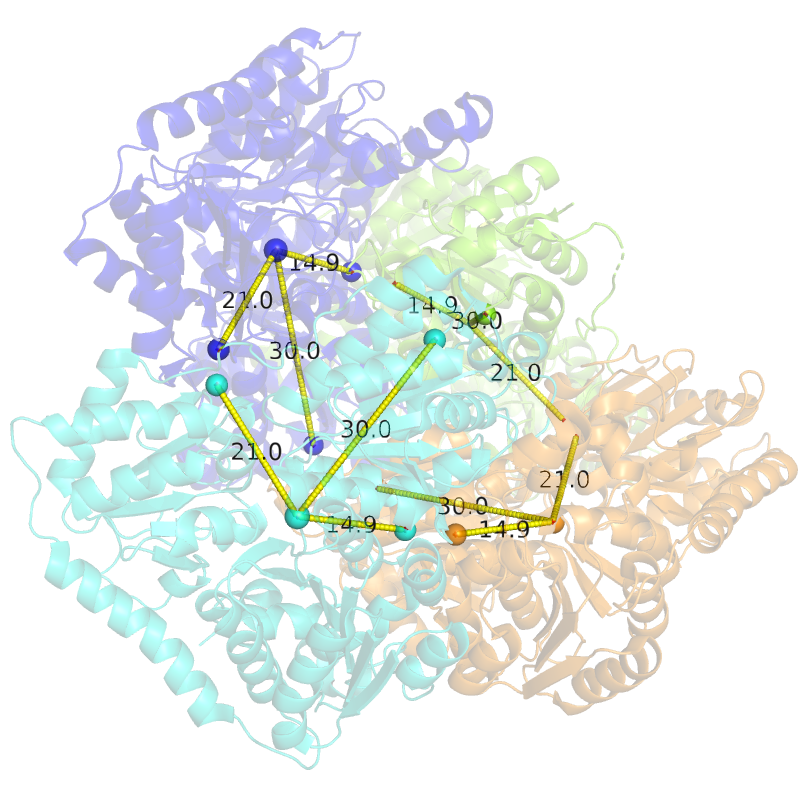

In [4]:
if save_folder.startswith('~'):
    abs_save_folder = os.path.expanduser(save_folder)
abs_save_folder = os.path.abspath(abs_save_folder)

subprocess.run(["pymol", "-cq", f"{abs_save_folder}/visualize_regularized_coarse_grained.pml"], check=True)
display(Image(filename=f"{abs_save_folder}/comparison_regularized.png"))

In [ ]:
simulation = ion.Simulation(pdb_model, save_folder)

In [ ]:
simulation.generate_nerdss_input()

In [ ]:
simulation.modify_mol_file('A', 
                           {'D': [20.0, 20.0, 20.0], 
                            'Dr': [0.2, 0.2, 0.2]}) # Example modification

simulation.print_mol_parameters('A')

In [ ]:
simulation.modify_inp_file({'nItr': 1000, 'timeStep': 0.5, 'timeWrite': 100, 'trajWrite': 100, 'pdbWrite': 100, 'A': 200, 'A(A1) + A(A1) <-> A(A1!1).A(A1!1)': {'onRate3Dka': 2000}}) # Example modification
simulation.print_inp_file()

In [ ]:
simulation.install_nerdss(nerdss_path="~/Documents/8y7s_dir") # this will update the nerdss folder if it already exists

In [ ]:
simulation.run_new_simulations(sim_indices=[1, 2, 3], 
                              sim_dir="~/Documents/8y7s_dir/nerdss_output", 
                              nerdss_dir="~/Documents/8y7s_dir/NERDSS", 
                              parallel=False)